Data Preparation dan Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape

(4600, 18)

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Length: 4600, dtype: bool

In [ ]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
df['date']=pd.to_datetime(df.date).dt.strftime('%d/%m/%Y')
df['price']=df['price'].astype('int')
df['bedrooms']=df['bedrooms'].astype('int')
df['bathrooms']=df['bathrooms'].astype('int')
df['floors']=df['floors'].astype('int')

In [ ]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,02/05/2014,490000,2,1,880,6380,1,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,02/05/2014,335000,2,2,1350,2560,1,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,02/05/2014,482000,4,2,2710,35868,2,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,02/05/2014,452500,3,2,2430,88426,1,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,02/05/2014,640000,4,2,1520,6200,1,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609430e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
dfi = df.drop(['date', 'sqft_lot', 'waterfront', 'view', 'condition', 'sqft_basement','yr_built','yr_renovated', 'street', 'city', 'statezip', 'country'], 1)

In [ ]:
dfi.head(20)

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above
0,313000,3,1,1340,1,1340
1,2384000,5,2,3650,2,3370
2,342000,3,2,1930,1,1930
3,420000,3,2,2000,1,1000
4,550000,4,2,1940,1,1140
5,490000,2,1,880,1,880
6,335000,2,2,1350,1,1350
7,482000,4,2,2710,2,2710
8,452500,3,2,2430,1,1570
9,640000,4,2,1520,1,1520


Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


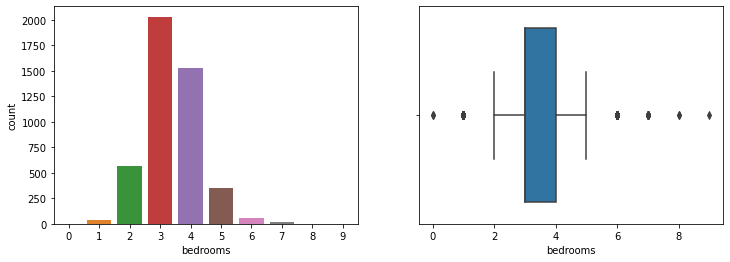

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(dfi['bedrooms'])

f.add_subplot(1,2,2)
sns.boxplot(x = dfi['bedrooms'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


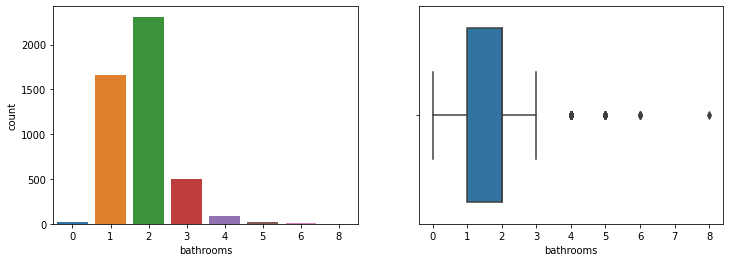

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(dfi['bathrooms'])

f.add_subplot(1,2,2)
sns.boxplot(x = dfi['bathrooms'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


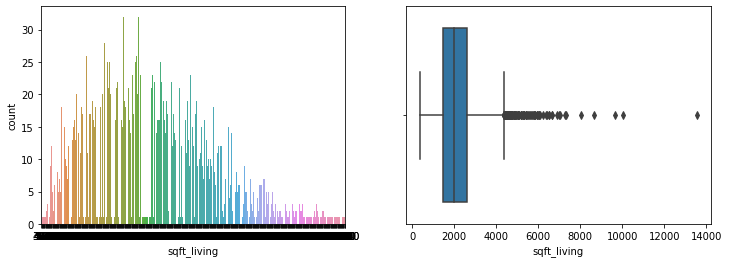

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(dfi['sqft_living'])

f.add_subplot(1,2,2)
sns.boxplot(x = dfi['sqft_living'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


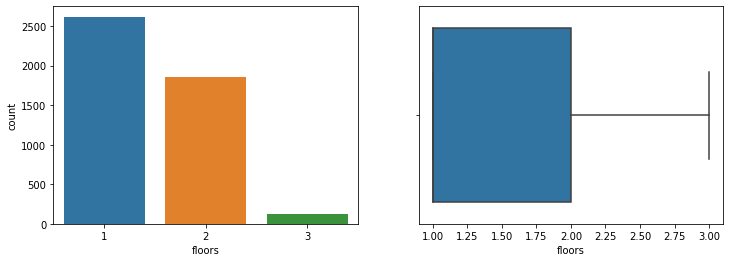

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(dfi['floors'])

f.add_subplot(1,2,2)
sns.boxplot(x = dfi['floors'])
plt.show()

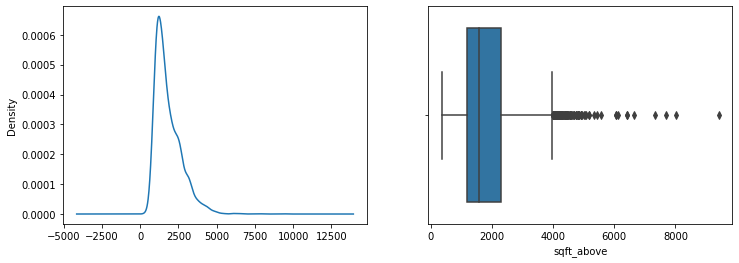

In [ ]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sqft_above'].plot(kind='kde')

f.add_subplot(1,2,2)
sns.boxplot(x = dfi['sqft_above'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

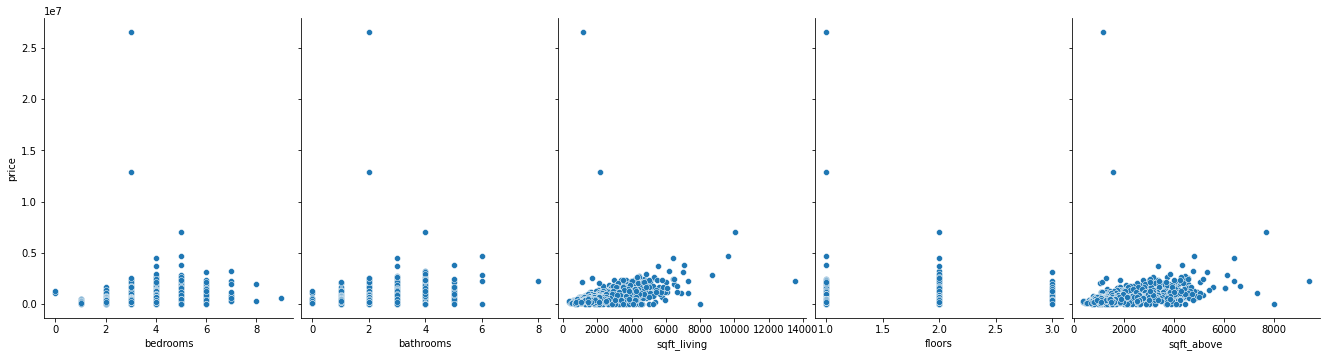

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=dfi, x_vars=['bedrooms','bathrooms','sqft_living', 'floors', 'sqft_above'], y_vars=['price']
             , size=5, aspect=0.75)

Korelasi

In [ ]:
dfi.corr().style.background_gradient().set_precision(2)

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above
price,1.00,0.20,0.32,0.43,0.14,0.37
bedrooms,0.20,1.00,0.50,0.59,0.16,0.48
bathrooms,0.32,0.50,1.00,0.71,0.46,0.65
sqft_living,0.43,0.59,0.71,1.00,0.34,0.88
floors,0.14,0.16,0.46,0.34,1.00,0.52
sqft_above,0.37,0.48,0.65,0.88,0.52,1.00


In [ ]:
corr = stats.pearsonr(dfi['bedrooms'], dfi['price'])
print('p-values   = ', corr[1])
print('Corelation = ', corr[0])

p-values   =  7.382050819632311e-43
Corelation =  0.20033629143491438


In [ ]:
corr = stats.pearsonr(dfi['bathrooms'], dfi['price'])
print('p-values   = ', corr[1])
print('Corelation = ', corr[0])

p-values   =  4.655039435269124e-108
Corelation =  0.31722923384258894


In [ ]:
corr = stats.pearsonr(dfi['sqft_living'], dfi['price'])
print('p-values   = ', corr[1])
print('Corelation = ', corr[0])

p-values   =  7.549833980968427e-207
Corelation =  0.43041002880721285


In [ ]:
corr = stats.pearsonr(dfi['floors'], dfi['price'])
print('p-values   = ', corr[1])
print('Corelation = ', corr[0])

p-values   =  9.459144753408281e-21
Corelation =  0.1371254593460493


In [ ]:
corr = stats.pearsonr(dfi['sqft_above'], dfi['price'])
print('p-values   = ', corr[1])
print('Corelation = ', corr[0])

p-values   =  3.8082872285069416e-147
Corelation =  0.3675696031839021


Tahapan Modelling

In [ ]:
x = dfi.drop(columns= ['price'])
y = dfi['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[-6.17463322e+04  3.25599278e+04  3.04571787e+02 -1.89544790e+04
 -3.94469126e+01]
154021.73638444394


In [ ]:
lin_reg.score(x_test, y_test)

0.42976967489752826

In [ ]:
df.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4590,07/08/2014,380680,4,2,2620,8331,2,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058,USA
4591,07/08/2014,396166,3,1,1880,5752,1,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4592,07/08/2014,252980,4,2,2530,8169,2,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4593,07/08/2014,289373,3,2,2538,4600,2,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,07/09/2014,210614,3,2,1610,7223,2,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4595,07/09/2014,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,07/09/2014,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,07/09/2014,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,07/10/2014,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,07/10/2014,220600,3,2,1490,8102,2,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
#predict
lin_reg.predict([[3, 2, 1600, 2, 2000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([404414.67133173])